# Data Analysis Project on Covid-19 Data

---



## Data Gathering Process

In [ ]:
# importing required libraries
import requests as req
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Fetching all table's contents we need from the web page
url = 'https://www.worldometers.info/coronavirus/'
html = req.get(url).text
soup = BeautifulSoup(html)
table = soup.find('table', attrs={'id' : 'main_table_countries_today'})
rows = table.find_all('tr')

## Data Cleansing Process

In [ ]:
# Clean data from white spaces and \n symbols and select only five cols we need by for loop
ls = []
for row in rows:
  ls.append(row.text.strip().split('\n')[1:5])

In [ ]:
# Using info function we obtained that cols do not have names and data types need to be fixed
pd.DataFrame(ls).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       248 non-null    object
 1   1       248 non-null    object
 2   2       248 non-null    object
 3   3       248 non-null    object
dtypes: object(4)
memory usage: 7.9+ KB


In [ ]:
# Removing all rows that don't have country names, setting columns names from first row then get rid of NewCases col because it's almost empty
df = pd.DataFrame(ls[9:240], columns = ls[0])
df.drop('NewCases', inplace = True, axis = 1)
# Removing commas from TotalCases and TotalDeaths value in order to change their data type to integer
df['TotalCases'] = df['TotalCases'].apply(lambda number:number.replace(',',''))
df['TotalCases'] = pd.to_numeric(df['TotalCases'])
df['TotalDeaths'] = df['TotalDeaths'].apply(lambda number:number.replace(',',''))
df['TotalDeaths'] = df['TotalDeaths'].replace(' ', '0')
df['TotalDeaths'] = pd.to_numeric(df['TotalDeaths'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country,Other  231 non-null    object
 1   TotalCases     231 non-null    int64 
 2   TotalDeaths    231 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.5+ KB


In [ ]:
df.to_csv('Covid19-Cleaned.csv')
df

,"Country,Other",TotalCases,TotalDeaths
0,USA,108602115,1176159
1,India,44998565,531930
2,France,40138560,167642
3,Germany,38486260,175989
4,Brazil,37789040,705313
...,...,...,...
226,Tokelau,80,0
227,Vatican City,29,0
228,Western Sahara,10,1
229,MS Zaandam,9,2


## **Data Visualization**


## Top 10 Countries With The Highest Number of Total Cases

<Axes: xlabel='Country,Other', ylabel='Total Cases in Hundred Million'>

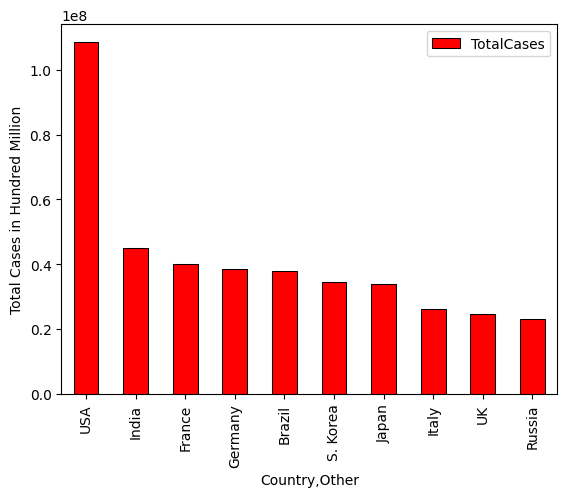

In [ ]:
dataPlot1 = df[['Country,Other', 'TotalCases']]
dataPlot1[:10].plot(kind = 'bar', x = 'Country,Other', y = 'TotalCases', ylabel = 'Total Cases in Hundred Million', color = 'red', edgecolor='black', linewidth=.75)

# Top 10 Countries With The Lowest Number of Total Cases

<Axes: xlabel='Country,Other', ylabel='Total Cases'>

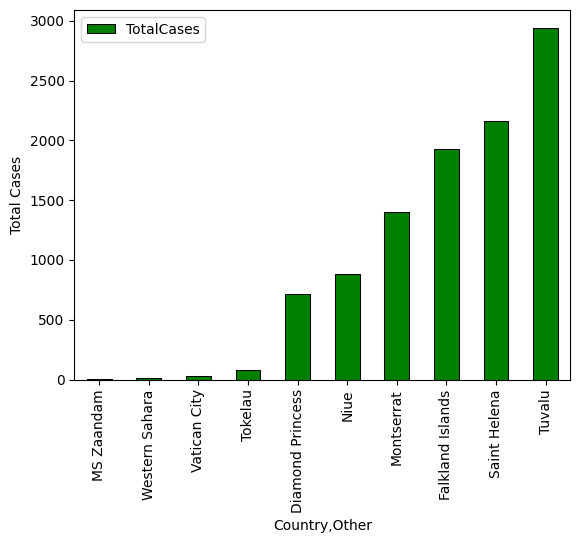

In [ ]:
df2 = df.sort_values('TotalCases', ascending = True)
dfPlot2 = df2[['Country,Other', 'TotalCases']]
dfPlot2[:10].plot(kind = 'bar', x = 'Country,Other', y = 'TotalCases', ylabel = 'Total Cases', color = 'green', edgecolor = 'black', linewidth = .75)

## Top 10 Countries With The Highest Number of Total Deaths

<Axes: xlabel='Country,Other', ylabel='Total Deaths in Million'>

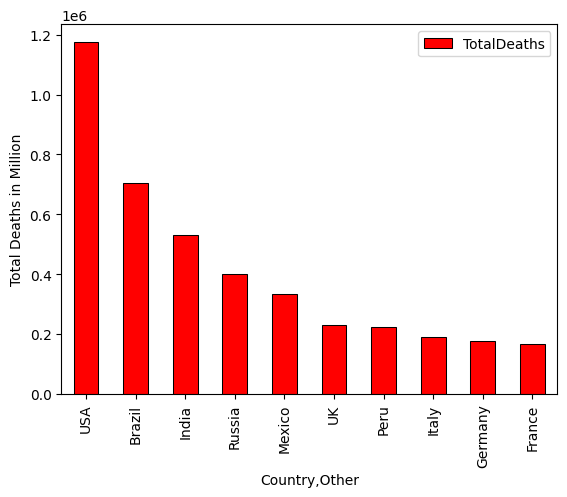

In [ ]:
df3 = df.sort_values('TotalDeaths', ascending = False)
dfPlot3 = df3[['Country,Other', 'TotalDeaths']]
dfPlot3[:10].plot(kind = 'bar', x = 'Country,Other', y = 'TotalDeaths', ylabel = 'Total Deaths in Million', color = 'red', edgecolor = 'black', linewidth = .75)

## Top 10 Countries With The Lowest Number of Total Deaths

<Axes: xlabel='Country,Other', ylabel='Total Deaths in Thousands'>

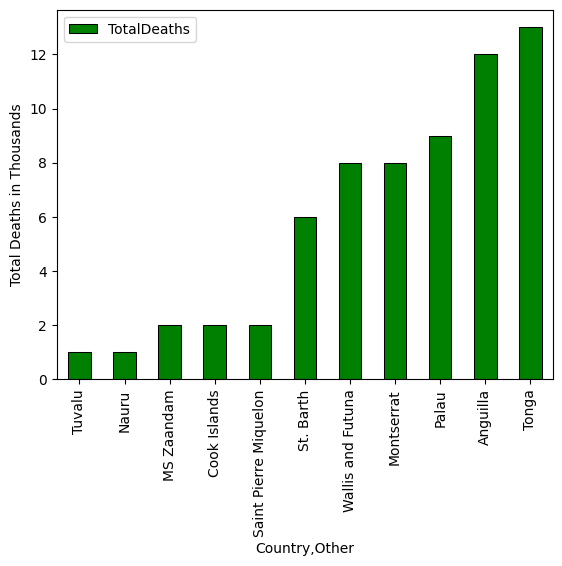

In [ ]:
df3 = df.sort_values('TotalDeaths', ascending = True)
dfPlot3 = df3[['Country,Other', 'TotalDeaths']]
dfPlot3[6:17].plot(kind = 'bar', x = 'Country,Other', y = 'TotalDeaths', ylabel = 'Total Deaths in Thousands', color = 'green', edgecolor = 'black', linewidth = .75)